# [ARE 212] Discussion Section - Python 04

- [Ethan's materials](https://github.com/ligonteaching/ARE212_Materials)

### Source Material

These notes are the fruits of arduous labor of others.  My contributions are minimual, but please expect to find some code (and even explanation) errors (and assume them all to be mine). If you find any mistakes or have questions, please [let me know](mailto:benjaminkrause@berkeley.edu).
    
The primary sources of these notes are:
- Ethan and in particular his EEP 153 Notes
- [Computational and Inferential Thinking: The Foundations of Data Science](https://www.inferentialthinking.com/chapters/intro.html) which is the textbook for UC Berkeley's [Data 8: The Foundations of Data Science](http://data8.org/) course.  All of the notes, readings, labs, and assignments are fully available online as well.  For instance, here is [Spring 2020](http://data8.org/sp20/).
- [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/)

### Follow-up from questions posed last week

- Where are the midterms? 
    - Posted to [bcourses with this annoucement](https://bcourses.berkeley.edu/courses/1487913/discussion_topics/5756751)
    - For those exams received, out of 30 points:
        - mean	    28.1
        - SD	    1.5
        - median	28.5
        - max	    30.0
        - min	    24.2
    - See the SpeedGrader portal on Bcourses for your individual question-by-question scores
- PS03 scores are also posted
- I'm talking this afternoon with Ethan and hope to confirm scores for the first half of bcourses Discussion participation over the weekend.
- Ethan noted few responses thus far to the [Feasible Optimally Weighted GMM estimators](https://bcourses.berkeley.edu/courses/1487913/discussion_topics/5756813) discussion post.

## Review Lecture Jupyter Notebooks 3

### Learning Goals Today

4.  Review [wright34](https://github.com/ligonteaching/ARE212_Materials/blob/master/wright34.ipynb)

5.  Review [iv_examples](https://github.com/ligonteaching/ARE212_Materials/blob/master/iv_examples.ipynb)

6.  Student Code Discussions
    - a. Shreya Dutt: Replicating Angrist-Krueger (1991)
    - b. Shuo Yu: Tests of Normality
    - c. Jacob Lefler: Matrix Economy 
    - d. Connor Jackson: Matrix Economy

#### Previous Section Materials:
- Introduction from the first week at `[ARE 212] Discussion Section - Python 01` on [datahub](https://datahub.berkeley.edu/user/benjaminkrause/notebooks/ARE212_Discussion_Section/%5BARE%20212%5D%20Discussion%20Section%20-%20Python%2001.ipynb) and [github](https://github.com/ligonteaching/ARE212_Materials/blob/master/Section/%5BARE%20212%5D%20Discussion%20Section%20-%20Python%2001.ipynb)
- Review of Lecture Jupyter Notebooks 1 at `[ARE 212] Discussion Section - Python 02` on [datahub](https://datahub.berkeley.edu/user/benjaminkrause/notebooks/ARE212_Discussion_Section/%5BARE%20212%5D%20Discussion%20Section%20-%20Python%2002.ipynb#) and [github](https://github.com/ligonteaching/ARE212_Materials/blob/master/Section/%5BARE%20212%5D%20Discussion%20Section%20-%20Python%2002.ipynb)
- Review of Lecture Jupyter Notebooks 2 at `[ARE 212] Discussion Section - Python 03` on [datahub](https://datahub.berkeley.edu/user/benjaminkrause/notebooks/ARE212_Discussion_Section/%5BARE%20212%5D%20Discussion%20Section%20-%20Python%2003.ipynb) and [github](https://github.com/ligonteaching/ARE212_Materials/blob/master/Section/%5BARE%20212%5D%20Discussion%20Section%20-%20Python%2003.ipynb)
- Or all of my Juptyer Notebooks to date in the [Section](https://github.com/ligonteaching/ARE212_Materials/tree/master/Section) folder on [Ethan's Github](https://github.com/ligonteaching/ARE212_Materials)

#### Open a `jupyter` notebook on [Google Colab](https://colab.research.google.com/notebooks/intro.ipynb#recent=true)

1. Add the [Google Chrome Extension for Colab](https://chrome.google.com/webstore/detail/open-in-colab/iogfkhleblhcpcekbiedikdehleodpjo?hl=en) to your browser
2. Navigate to a `Jupyter Notebook` file in `Github`
3. Click on the `Colab` icon at the top of your browser.

A new functional instance of the `Jupyter Notebook` should open in a new tab your browser.

#### Open a `jupyter` notebook on [datahub.berkeley.edu](https://datahub.berkeley.edu/)

1. Open the website [URL to Interact](https://url-to-interact.herokuapp.com/)
2. For `1. Choose your desired hub:` select `datahub.berkeley.edu`
3. Either navigate to [my github](https://github.com/bk-econ/share) page and select the `URL` of the correct section or simply copy it from right here: https://github.com/bk-econ/share/blob/master/%5BARE%20212%5D%20Discussion%20Section%20-%20Python%2001.ipynb
4. Paste the `URL` you copied in the previous step into `2. Paste the GitHub URL for your file or folder in the box below.`
5. Click `Convert to interact link!`
6. Copy the new `URL` generated in field `4. Your interact link URL will appear in the box below.`
7. Paste the new `URL` in any web browser and get to it!

## 4. [wright34](https://datahub.berkeley.edu/user/benjaminkrause/notebooks/ARE212_Materials/wright34.ipynb)

or see [wright34 on github](https://github.com/ligonteaching/ARE212_Materials/blob/master/wright34.ipynb)

### Quantities & Prices



Suppose for some good we observe data on total quantity $q$ exchanged
between buyers & sellers, and the prices $p$ at which these exchanges
took place.  

The following code creates a data generating process for $(q,p)$ based
on Goldberger (1972), who in turn is describing the work of Sewall
Wright (1934).  The demand-supply system is
$$
   q_D = \alpha p + u\qquad q_S = \beta p + v\qquad q_D = q_S,
$$
where $(u,v)$ are unobserved shocks to demand and supply,
respectively. 



In [1]:
# 4.1 ORIGINAL CODE

import numpy as np
import pandas as pd
from scipy.stats import distributions as iid

# Structural parameters;
(α,β) = (-1,2)     
σ = {'u':1/2,'v':1/3}
μ = {'u':2,'v':-1}

# u,v assumed independent
u = iid.norm(loc=μ['u'], scale=σ['u'])  # Demand shocks
v = iid.norm(loc=μ['v'], scale=σ['v'])  # Supply shocks

# Reduced form coefficients
π = [[-β/(α - β), -1/(α - β)],
     [ α/(α - β), 1/(α - β)]]

# Generate N realizations of system
# Outcomes Y have columns (q,p)
N = 10

# Arrange shocks into an Nx2 matrix
U = np.c_[u.rvs(N), v.rvs(N)]

# Matrix prboduct gives [q,p]; label by putting into df
df = pd.DataFrame(U@π,columns=['q','p'])
Udf = pd.DataFrame(U,columns=['u','v']) # For future reference

<font color='red'> *notes*: </font>
- Dictionaries vs. Lists <br> 
(based on [Dictionaries in Python](https://realpython.com/python-dicts/), [Python — List vs Tuple vs Dictionary](https://medium.com/@paulrohan/python-list-vs-tuple-vs-dictionary-4a48655c7934), and [What's the difference between lists and tuples?](https://stackoverflow.com/questions/626759/whats-the-difference-between-lists-and-tuples))
    - Common characteristics:
        - Mutable - can be changed (unlike, for instance, tuples)
        - Dynamic - They can grow and shrink as needed
        - Can be nested - A list can contain another list. A dictionary can contain another dictionary. A dictionary can also contain a list, and vice versa.
    - Differences
        - Declaring
            - List: []
            - Dictionary: {}
            - Tuples: ()
        - Accessing elements: 
            - List: elements are accessed by their position via indexing.
            - Dictionary: elements accessed via **keys** (remember that Dictionaries are **key:value** pairs)
            
- Tuples (based on )
    - Immutable (and **keys** for Dictionaires must be immutable)
    - Tuples are for heterogeneous data (structure) vs. Lists are for homogenous data (order)
        - tuple: (page number, line number) vs. list: [page 1, page 5, page 44]
        
- `iid.norm()?`: "A normal continuous random variable."
    - `loc` specifies mean
    - `scale` specifies standard deviation
- `iid.c_`: "Translates slice objects to concatenation along the second axis."



In [2]:
# Immutability of Tuples

tupleA = (1, 2, 3, 4)
del tupleA[0]
print(tupleA)
del tupleA
print(tupleA)

TypeError: 'tuple' object doesn't support item deletion

In [3]:
# Immutability of Tuples continued
list_num = [1,2,3,4]
tup_num = (1,2,3,4)
print(list_num)
print(tup_num)


list_num[2] = 5
print(list_num)

tup_num[2] = 5
print(tup_num)

[1, 2, 3, 4]
(1, 2, 3, 4)
[1, 2, 5, 4]


TypeError: 'tuple' object does not support item assignment

In [4]:
# Example code 1: 

# Lists
A = [ ] # This is a blank list variable
print(A)

B = [1, 23, 45, 67] # this list creates an initial list of 4 numbers.
print(B)

C = [2, 4, 'ben shows some lists', 18, True] # lists can contain different variable types.
print(C)

[]
[1, 23, 45, 67]
[2, 4, 'ben shows some lists', 18, True]


In [5]:
# Example code 2: 
 
# Slicing a list
## From the first element up to a given position: 
print(C[:3])

## From a given position until the last element: 
print(C[2:])

## Between two given positions in the list: 
print(C[2:4])

## all the members of the list: 
print(C[:])

## up to the second to last member of the list
print(C[:-1])

## the second to last member of the list
print(C[-2])

[2, 4, 'ben shows some lists']
['ben shows some lists', 18, True]
['ben shows some lists', 18]
[2, 4, 'ben shows some lists', 18, True]
[2, 4, 'ben shows some lists', 18]
18


In [6]:
# iid.norm?
# np.c_?

In [15]:
# 4.1 CODE ABOVE WITH COMMENTS AND PRINTING

# Import the necessary modules (R::library())
import numpy as np
import pandas as pd
from scipy.stats import distributions as iid

# Structural parameters;
(α,β) = (-1,2) 
print(type((α,β)))
print("(α,β) = ", (α,β))
print("α = ", (α,β)[0])
print("β = ", (α,β)[1])

σ = {'u':1/2,'v':1/3}
print(type(σ))
print("σ:u =", σ['u'])
print("σ:v =", σ['v'])

μ = {'u':2,'v':-1}
print("μ:u =", μ['u'])
print("μ:v =", μ['v'])

# Set seed
np.random.seed( 30 )

# u,v assumed independent
u = iid.norm(loc=μ['u'], scale=σ['u'])  # Demand shocks
print(type(u))
print("u = ", u)

v = iid.norm(loc=μ['v'], scale=σ['v'])  # Supply shocks
print(type(v))
print("v = ", v)

# Reduced form coefficients
π = [[-β/(α - β), -1/(α - β)],
     [ α/(α - β), 1/(α - β)]]
print(type(π))
print("π = ", π)

# Generate N realizations of system
# Outcomes Y have columns (q,p)
N = 10

# Arrange shocks into an Nx2 matrix
U = np.c_[u.rvs(N), v.rvs(N)]
print("U =", U)

# Matrix product gives [q,p]; label by putting into df
df = pd.DataFrame(U@π,columns=['q','p']) 
### R:: df <- as.data.frame(U %*% π)  
###     names(df) <- c("q", "p")
print(type(df))
print("df = ", df)

Udf = pd.DataFrame(U,columns=['u','v']) # For future reference
### R:: df <- as.data.frame(U)  
###     names(df) <- c('u','v')
print(type(Udf))
print("Udf = ", Udf)

<class 'tuple'>
(α,β) =  (-1, 2)
α =  -1
β =  2
<class 'dict'>
σ:u = 0.5
σ:v = 0.3333333333333333
μ:u = 2
μ:v = -1
<class 'scipy.stats._distn_infrastructure.rv_frozen'>
u =  <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f0ec16398d0>
<class 'scipy.stats._distn_infrastructure.rv_frozen'>
v =  <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f0ec16399e8>
<class 'list'>
π =  [[0.6666666666666666, 0.3333333333333333], [0.3333333333333333, -0.3333333333333333]]
U = [[ 1.36797367 -0.47392482]
 [ 2.76395268 -0.96416735]
 [ 1.51464453 -1.25468261]
 [ 2.23527981 -1.25839617]
 [ 1.94965164 -0.53871761]
 [ 2.15189659 -0.74653831]
 [ 1.13701879 -1.09521517]
 [ 2.79254768 -0.82054417]
 [ 2.0671483  -1.69463221]
 [ 1.44657227 -0.6874061 ]]
<class 'pandas.core.frame.DataFrame'>
df =            q         p
0  0.754008  0.613966
1  1.521246  1.242707
2  0.591535  0.923109
3  1.070721  1.164559
4  1.120195  0.829456
5  1.185752  0.966145
6  0.392941  0.744078
7  1.588184  1.204364
8 

We can interrogate these data:



In [4]:
# 4.2 ORIGINAL CODE
df

,q,p
0,0.754008,0.613966
1,1.521246,1.242707
2,0.591535,0.923109
3,1.070721,1.164559
4,1.120195,0.829456
5,1.185752,0.966145
6,0.392941,0.744078
7,1.588184,1.204364
8,0.813221,1.253927
9,0.735246,0.711326


And compute the linear correlation&#x2026;



In [5]:
# 4.3 ORIGINAL CODE
df.corr()

,q,p
q,1.000000,0.637353
p,0.637353,1.000000


Or more generally the covariance matrix:



In [6]:
# 4.4 ORIGINAL CODE
C=df.cov()
C

,q,p
q,0.151924,0.059381
p,0.059381,0.057136


From which we can calculate the linear regression coefficient
of $p = a + bq + e$:



In [11]:
# 4.5 ORIGINAL CODE
C.loc['p','q']/C.loc['q','q']

0.3908614932109904

In [8]:
# 4.5 CODE ABOVE WITH COMMENTS AND PRINTING
print(C.loc['p','q'])

print(C.loc['q','q'])

C.loc['p','q']/C.loc['q','q']

0.05938124713329541
0.15192401442636075


0.3908614932109904

And learn about the probability density&#x2026;



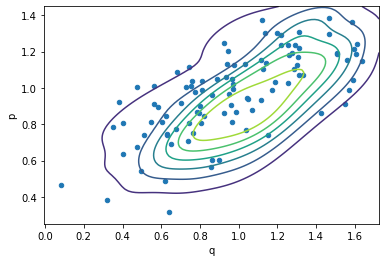

In [12]:
# 4.6 ORIGINAL CODE
from scipy import stats
import numpy as np

# Estimate joint density of (q,p)
pdf = stats.gaussian_kde(df.T).pdf 

ax = df.plot.scatter(x='q',y='p')

v = ax.axis()
Q = np.mgrid[v[0]:v[1]:100j].tolist()
Q = np.mgrid[v[0]:v[1]:100j].tolist()
P = np.mgrid[v[2]:v[3]:100j].tolist()

_ = ax.contour(Q,P,np.array([[pdf((q,p))[0] for p in P] for q in Q]))

<font color='red'> *notes*: </font>
- `stats.gaussian_kde?`: Representation of a kernel-density estimate (KDE) using Gaussian kernels.
- `ax.axis?`: returns (xmin, xmax, ymin, ymax)
- `ax.contour?`: draw contour lines and filled contours
    - contour([X, Y,] Z, [levels], **kwargs)
    - For more on plotting density and contours see [Density and Contour Plots](https://jakevdp.github.io/PythonDataScienceHandbook/04.04-density-and-contour-plots.html) from the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do)

<bound method gaussian_kde.pdf of <scipy.stats.kde.gaussian_kde object at 0x7f0ec15cd5f8>>


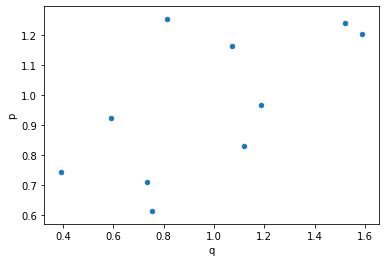

In [20]:
# 4.6a CODE ABOVE WITH COMMENTS AND PRINTING
from scipy import stats
import numpy as np

# Estimate joint density of (q,p) 
pdf = stats.gaussian_kde(df.T).pdf
print(pdf)

ax = df.plot.scatter(x='q',y='p')


(0.32583195468355103, 1.6552925769334697, 0.570656157723093, 1.2972368395518445)
<class 'list'>
[0.32583195468355103, 0.6581971102460307, 0.9905622658085103, 1.32292742137099, 1.6552925769334697]


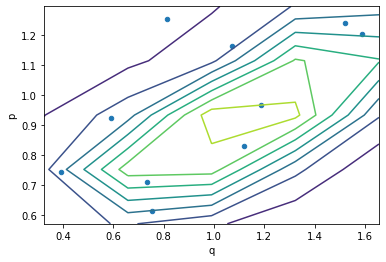

In [16]:
# 4.6b CODE ABOVE WITH COMMENTS AND PRINTING

ax = df.plot.scatter(x='q',y='p')

v = ax.axis()
print(v)

Q = np.mgrid[v[0]:v[1]:5j].tolist() # Note that the 5j is identifying how many steps between v[0] (xmin) and v[1] (xmax)
print(type(Q))
print(Q)

P = np.mgrid[v[2]:v[3]:5j].tolist()

_ = ax.contour(Q,P,np.array([[pdf((q,p))[0] for p in P] for q in Q])) # Note like running 2 for loops

#### Counterfactual Demand & Supply Schedules



What are the actual *counterfactual* demand and
supply schedules?  This is the kind of thing that Frisch described as
&ldquo;hypothetical experiments.&rdquo;  The schedules respond to shocks $u$ and $v$, respectively,
yielding



In [ ]:
# 4.7 ORIGINAL CODE
qmax = df['q'].max()
qmin = df['q'].min()

Q = pd.DataFrame({'min':np.maximum(0,df['q']-0.3*(qmax-qmin)),
                  'max':np.minimum(qmax*1.2,df['q']+0.3*(qmax-qmin)),
                  'miss':-1})

# Inverse counterfactual demand & supply (for plotting)
D = Q.add(-Udf['u'],axis=0)/α  
S = Q.add(-Udf['v'],axis=0)/β

counterfactual=pd.DataFrame({'S':S.stack(),
                             'D':D.stack(),
                             'Q':Q.stack()})

counterfactual=counterfactual.replace(-1,np.nan)

_ = counterfactual.plot(x='Q')

In [38]:
np.nan?

<font color='red'> *notes*: </font>
- `.add` 
- `np.maximum`: Element-wise maximum of array elements.
- `**kwargs`: keyword-only elements
- `axis`: refers to the dimension of the array. In the case of Pandas, axis=0 points downwards (column-wise), axis=1 points to the right (row-wise).

In [52]:
# 4.7a CODE ABOVE WITH COMMENTS AND PRINTING

# Remember that following a call with .function() is similar to R:: %>% max()
### this calls all of df's q column
qAll = df['q']
print("qAll = ", qAll)

### this just calls the maximum value in df's q column
qmax = df['q'].max() 
print("qmax = ", qmax)

### this just calls the minimum value in df's q column
qmin = df['q'].min()
print("qmin = ", qmin)

# Make a dataframe with columns "min", "max", and "miss" generated accordingly
Q = pd.DataFrame({'min':np.maximum(0,df['q']-.3*(qmax-qmin)),
                  'max':np.minimum(qmax*1.2,df['q']+0.3*(qmax-qmin)),
                  'miss':-1})
print(type(Q))
print("Q = ", Q)

# Inverse counterfactual demand & supply (for plotting)
### As a reminder, this is what Udf's u column is like
print("Udf['u'] = ", Udf['u'])

### For the Counterfactual Demand, column-wise subtract Udf's u column from each column in Q and divide by α = -1
D = Q.add(-Udf['u'],axis=0)/α 
print("D = ", D)

### For the Counterfactual Supply, column-wise subtract Udf's v column from each column in Q and divide by β = 2
S = Q.add(-Udf['v'],axis=0)/β
print("S = ", S)

### combine S, D, and Q together in dataframe
counterfactual=pd.DataFrame({'S':S.stack(),
                             'D':D.stack(),
                             'Q':Q.stack()})
print(type(counterfactual))
print(counterfactual)


qAll =  0    0.754008
1    1.521246
2    0.591535
3    1.070721
4    1.120195
5    1.185752
6    0.392941
7    1.588184
8    0.813221
9    0.735246
Name: q, dtype: float64
qmax =  1.5881837315122862
qmin =  0.3929408001047344
<class 'pandas.core.frame.DataFrame'>
Q =          min       max  miss
0  0.395435  1.112580    -1
1  1.162673  1.879819    -1
2  0.232963  0.950108    -1
3  0.712148  1.429294    -1
4  0.761622  1.478768    -1
5  0.827179  1.544325    -1
6  0.034368  0.751514    -1
7  1.229611  1.905820    -1
8  0.454649  1.171794    -1
9  0.376673  1.093819    -1
Udf['u'] =  0    1.367974
1    2.763953
2    1.514645
3    2.235280
4    1.949652
5    2.151897
6    1.137019
7    2.792548
8    2.067148
9    1.446572
Name: u, dtype: float64
D =          min       max      miss
0  0.972539  0.255393  2.367974
1  1.601280  0.884134  3.763953
2  1.281682  0.564536  2.514645
3  1.523132  0.805986  3.235280
4  1.188029  0.470884  2.949652
5  1.324718  0.607572  3.151897
6  1.102651  0.385

<font color='red'> *notes*: </font>
- `.replace(x,y)`: replace all x with y
- `np.nan`: "Not a Number", similar to `NA` in `R`.  For a discussion of how Pandas works with the forms of missingness `None` and `NaN` see [Working with Missing Data in Pandas](https://www.geeksforgeeks.org/working-with-missing-data-in-pandas/)
- `.plot`:

               S         D         Q
0 min   0.434680  0.972539  0.395435
  max   0.793253  0.255393  1.112580
  miss -0.263038  2.367974       NaN
1 min   1.063420  1.601280  1.162673
  max   1.421993  0.884134  1.879819
  miss -0.017916  3.763953       NaN
2 min   0.743823  1.281682  0.232963
  max   1.102395  0.564536  0.950108
  miss  0.127341  2.514645       NaN
3 min   0.985272  1.523132  0.712148
  max   1.343845  0.805986  1.429294
  miss  0.129198  3.235280       NaN
4 min   0.650170  1.188029  0.761622
  max   1.008743  0.470884  1.478768
  miss -0.230641  2.949652       NaN
5 min   0.786859  1.324718  0.827179
  max   1.145431  0.607572  1.544325
  miss -0.126731  3.151897       NaN
6 min   0.564792  1.102651  0.034368
  max   0.923364  0.385505  0.751514
  miss  0.047608  2.137019       NaN
7 min   1.025078  1.562937  1.229611
  max   1.363182  0.886727  1.905820
  miss -0.089728  3.792548       NaN
8 min   1.074640  1.612500  0.454649
  max   1.433213  0.895354  1.171794
 

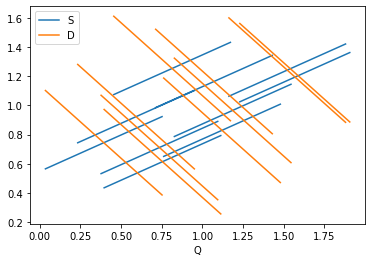

In [50]:
# 4.7b CODE ABOVE WITH COMMENTS AND PRINTING

# replace all cells that equal -1 with NaN
### Note that what we're doing is setting all of Q's miss values to NaN
counterfactual=counterfactual.replace(-1,np.nan)
print(counterfactual)

_ = counterfactual.plot(x='Q')

#### Controlling Price



Consider the question: what would expected demand be if we *fixed*
    the price at $p_0$?  Expected supply?



#### Average Causal Effect of a Change in Price



What would expected demand be if we *observed* that the price was $p_0$?



#### Price Change /Ceteris Paribus/



Suppose we *observe* prices and quantities $(p_0,q_0)$.  How *would*
    we expect the quantity demanded to change if prices were instead
    fixed at $p_1$, *ceteris paribus*?



## 5. [iv_examples](https://datahub.berkeley.edu/user/benjaminkrause/notebooks/ARE212_Materials/iv_examples.ipynb)

or see github [iv_examples](https://github.com/ligonteaching/ARE212_Materials/blob/master/iv_examples.ipynb)

## Instrumental Variables in Canonical Demand & Supply Model



### Data-Generating Process



In [55]:
# 5.1 ORIGINAL CODE

import numpy as np
import pandas as pd
from scipy.stats import distributions as iid

# Unobservable component of supply shock z
# Can have any distribution one pleases
w = iid.beta(1,2,loc=-iid.beta(1,2).mean()) # Centered for convenience

# Structural parameters;
(alpha,beta) = (-1,2)     
sigma = {'u':1/2,'v':1/3}
mu = {'u':2,'v':-1}

# u,v assumed independent
u = iid.norm(loc=mu['u'], scale=sigma['u'])  # Demand shocks
v = iid.norm(loc=mu['v'], scale=sigma['v'])  # Supply shocks

# Reduced form coefficients
pi = [[-beta/(alpha - beta), -1/(alpha - beta)],
     [ alpha/(alpha - beta), 1/(alpha - beta)]]

# Generate N realizations of system
# Outcomes have columns (p,q,z)
def wright_dgp(N):
    """
    Generate data consistent with Wright (1934) hog demand and supply.

    Returns a pandas dataframe with N observations on (p,q,z), where
    z is understood to be a supply shock.
    """
    
    # Arrange shocks into an Nx2 matrix
    U = np.c_[u.rvs(N), v.rvs(N)]

    # Matrix product gives [q,p]; label by putting into df
    df = pd.DataFrame(U@pi,columns=['q','p'])

    Udf = pd.DataFrame(U,columns=['u','v']) # For future reference

    # Relate v and z (need not be linear)
    unobserved_shock = w.rvs(N)/10
    df['z'] = (1-unobserved_shock)*np.exp(4*Udf['v'] - unobserved_shock)
    df['Constant'] = 1

    # Include a constant term in both X & Z
    return df[['q']],df[['Constant','p']],df[['Constant','z']]

<font color='red'> *notes*: </font>
- `iid.beta`: A beta continuous random variable.  As an instance of the `rv_continuous` class, `beta` object inherits from it a collection of generic methods.  The probability density function for `beta` is:

    $f(x, a, b) = \frac{\Gamma(a+b) x^{a-1} (1-x)^{b-1}}{\Gamma(a) \Gamma(b)}$ where $\Gamma(z) = \int_0^\infty x^{z-1} e^{-x} dx = (z - 1)!$


In [63]:
# 5.1 CODE ABOVE WITH COMMENTS AND PRINTING

import numpy as np
import pandas as pd
from scipy.stats import distributions as iid

# Unobservable component of supply shock z
# Can have any distribution one pleases
w = iid.beta(1,2,loc=-iid.beta(1,2).mean()) # Centered for convenience

# Structural parameters
### Note again setting up a tuple for (alpha, beta) followed by dictionaries for sigma and mu
(alpha,beta) = (-1,2)     
sigma = {'u':1/2,'v':1/3}
mu = {'u':2,'v':-1}

# u,v assumed independent
### `loc` specifies mean
### `scale` specifies standard deviation
u = iid.norm(loc=mu['u'], scale=sigma['u'])  # Demand shocks
v = iid.norm(loc=mu['v'], scale=sigma['v'])  # Supply shocks

# Reduced form coefficients
pi = [[-beta/(alpha - beta), -1/(alpha - beta)],
     [ alpha/(alpha - beta), 1/(alpha - beta)]]

# Generate N realizations of system
# Outcomes have columns (p,q,z)
def wright_dgp(N):
    """
    Generate data consistent with Wright (1934) hog demand and supply.

    Returns a pandas dataframe with N observations on (p,q,z), where
    z is understood to be a supply shock.
    """
    
    # Arrange shocks into an Nx2 matrix
    ### .c_ is concatenating the two sets of N draws from our random variables
    U = np.c_[u.rvs(N), v.rvs(N)]

    # Matrix product gives [q,p]; label by putting into df
    df = pd.DataFrame(U@pi,columns=['q','p'])
    
    ### Save U as a dataframe
    Udf = pd.DataFrame(U,columns=['u','v']) # For future reference

    # Relate v and z (need not be linear)
    ### unobserved_shock gets N draws from random variable w which are each divided by 10
    unobserved_shock = w.rvs(N)/10
    
    ### df's z column gets this data generating process
    df['z'] = (1-unobserved_shock)*np.exp(4*Udf['v'] - unobserved_shock)
    
    ### df's Constant column is all 1's
    df['Constant'] = 1

    # Include a constant term in both X & Z
    ### return three different sets of df
    return df[['q']],df[['Constant','p']],df[['Constant','z']]

### Estimation



Let&rsquo;s write some code to estimate the parameters of the regression
   model using the estimator devised above (the &ldquo;simple IV estimator&rdquo;):



In [64]:
# 5.2 ORIGINAL CODE

import numpy as np

def draw_b(N,dgp):
    """
    Generate a random variate $b$ from a sample of $N$ draws from the Wright (1934) DGP.
    """
    y,X,Z =  dgp(N)

    return np.linalg.solve(Z.T@X,Z.T@y) # Solve normal eqs

b = draw_b(10000,wright_dgp)

print(b)

[[ 2.0019765 ]
 [-0.99886835]]


In [65]:
# 5.2 CODE ABOVE WITH COMMENTS AND PRINTING

import numpy as np

def draw_b(N,dgp):
    """
    Generate a random variate $b$ from a sample of $N$ draws from the Wright (1934) DGP.
    """
    y,X,Z =  dgp(N)

    ### remember np.linalg.solve is analogous to R:: solve(t(Z) %*% X) %*% t(Z) %*% y
    return np.linalg.solve(Z.T@X,Z.T@y) # Solve normal eqs

### take our two new classes for a drive with 1000 draws
b = draw_b(10000,wright_dgp)

print(b)

[[ 2.15078643]
 [-1.1584841 ]]


### Inference



Now consider the point that the estimator $b$ is a random variable.
 Under the assumptions of the *model* a Central Limit Theorem applies,
 so it&rsquo;s asymptotically normal.  But in any finite sample the just
 identified linear IV estimator can be feisty.  Let&rsquo;s explore using a
 little Monte Carlo experiment.  Let&rsquo;s begin by constructing a
 slightly more transparent data-generating process, in which $Z$ and
 $X$ have a linear relationship:



In [66]:
# 5.3 ORIGINAL CODE

from scipy.stats import distributions as iid

def linear_dgp(N,beta,gamma,pi,sigma_u,sigma_v):
    u = iid.norm(scale=sigma_u).rvs(N)
    v = iid.norm(scale=sigma_v).rvs(N)
    Z = iid.norm().rvs(N)

    X = Z*pi + v
    y = X*beta + u

    df = pd.DataFrame({'y':y,'x':X,'z':Z,'Constant':1})

    return df[['y']],df[['Constant','x']],df[['Constant','z']]

The next bit of code *repeatedly* draws new random samples and
  calculates $b$ from them; we then construct a histogram of the
  resulting estimates.



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0ec00460f0>]],
      dtype=object)

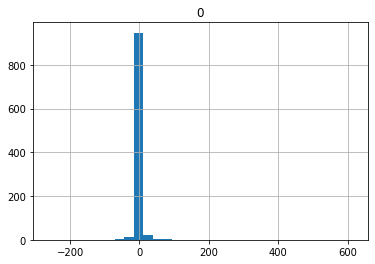

In [69]:
# 5.4 ORIGINAL CODE 

from matplotlib import pyplot as plt

B = pd.DataFrame([draw_b(100,lambda N: linear_dgp(N,1,0,.01,1,1))[1] for i in range(1000)])
B.hist(bins=int(np.ceil(np.sqrt(B.shape[0]))))

<font color='red'> *notes*: </font>
- `range()`: Return an object that produces a sequence of integers from start (inclusive)
to stop (exclusive) by step.  range(i, j) produces i, i+1, i+2, ..., j-1.
start defaults to 0, and stop is omitted! range(4) produces 0, 1, 2, 3.
- `pd.hist()`: Returns a histogram
- `int`: Convert a number or string to an integer, or return 0 if no arguments
are given.
- `np.ceil`: Return the ceiling of the input, element-wise.  The ceil of the scalar `x` is the smallest integer `i`, such that `i >= x`.  It is often denoted as $\lceil x \rceil$.
- `np.shape`: length of the corresponding array dimensions.  `R:: length()`


[[-0.10557863]
 [ 0.14060197]]
            0
0    2.157655
1   -0.104527
2    2.534437
3   -0.250530
4    2.183071
5    0.698401
6    1.436615
7    1.302492
8   -0.701173
9   -0.742346
10  -0.217044
11   2.265391
12   0.518350
13   1.645344
14   1.464859
15   0.468930
16   5.579828
17   2.296764
18   4.960017
19   1.535718
20   0.324410
21   1.039797
22   1.037912
23  -0.571672
24   3.080482
25  -0.928576
26  -4.447650
27   0.363443
28   2.669506
29   2.052447
..        ...
970  1.167228
971  3.670309
972  2.452843
973  0.127050
974 -3.645506
975  0.658996
976  0.760518
977  3.194766
978  1.025535
979  1.190756
980  0.672924
981  4.397384
982  0.972592
983  2.246860
984 -2.459413
985 -7.587911
986  5.191141
987 -0.573548
988  4.094165
989 -9.428810
990  0.560440
991  3.345593
992 -4.622303
993  5.720079
994 -1.504883
995  2.812873
996  2.413874
997  2.528000
998  7.017505
999 -9.252035

[1000 rows x 1 columns]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0ebfe98358>]],
      dtype=object)

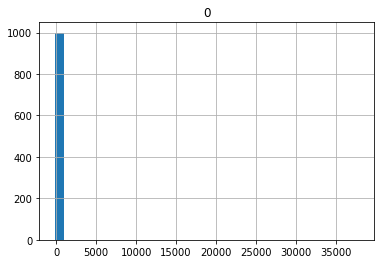

In [84]:
# 5.4 CODE ABOVE WITH COMMENTS AND PRINTING

from matplotlib import pyplot as plt

### B gets a dataframe we make using our draw_b class with our linear_dgp as the DGP
### recall that linear_dgp takes:
##### N = N (which we are passing as 100 in the argument immediately before)
##### beta = 1
##### gamma = 0
##### pi = .01
##### sigma_u = 1
##### sigma_v = 1

# We can take a look at the first draw
B0 = draw_b(100,lambda N: linear_dgp(N,1,0,.01,1,1))
print(B0)

# Then do the full set of 1000 draws (only returning the values for b)
B = pd.DataFrame([draw_b(100,lambda N: linear_dgp(N,1,0,.01,1,1))[1] for i in range(1000)])
print(B)

# histogram with bins that are the integer value of the ceiling of the squareroot of the length of the first column of B
B.hist(bins=int(np.ceil(np.sqrt(B.shape[0]))))

## 6. Student Code Discussions

### 6a. Replicating Angrist-Krueger (1991) 
(submitted to [Bcourses Discussion](https://bcourses.berkeley.edu/courses/1487913/discussion_topics/5738463) by Shreya Dutt)

In [1]:
%matplotlib inline

# Load libraries
import os
import numpy as np
import numpy.linalg
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy.stats import norm
import random
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.linalg as la

In [2]:
#Data is stored in the directory below
dir = r'C:\Users\HP\Documents\ShreyaDutt\Personal\Berkeley\Sem2\ARE212Econometrics\2nd Half'
os.chdir(dir)

In [3]:
#Read the dataset
data = pd.read_stata('angrist-krueger91.dta')
data.describe()

,ageq,edu,logwage,married,state,qob,black,smsa,yob,region
count,329509.000000,329509.000000,329509.000000,329509.000000,329509.000000,329509.000000,329509.000000,329509.000000,329509.000000,329509.000000
mean,45.020336,12.769912,5.899992,0.862559,30.692646,2.506429,0.081676,0.813668,1934.602773,3.625865
std,2.920789,3.281244,0.678769,0.344313,14.218379,1.111922,0.273871,0.389375,2.904956,2.654053
min,40.250000,0.000000,-2.341806,0.000000,1.000000,1.000000,0.000000,0.000000,1930.000000,0.000000
25%,42.500000,12.000000,5.636505,1.000000,19.000000,2.000000,0.000000,1.000000,1932.000000,1.000000
50%,45.000000,12.000000,5.952494,1.000000,34.000000,3.000000,0.000000,1.000000,1935.000000,3.000000
75%,47.500000,15.000000,6.257376,1.000000,42.000000,3.000000,0.000000,1.000000,1937.000000,6.000000
max,50.000000,20.000000,10.532096,1.000000,56.000000,4.000000,1.000000,1.000000,1939.000000,8.000000


In [4]:
#Create yob, qob, region dummies
s = pd.get_dummies(data,prefix = ['yob', 'qob', 'region'],columns = ['yob', 'qob', 'region'], drop_first = True)
s['ageq_sq'] = s['ageq']**2
s = s.rename(columns={"region_1.0": "region_1", "region_2.0": "region_2", "region_3.0": "region_3", "region_4.0": "region_4", "region_5.0": "region_5", "region_6.0": "region_6", "region_7.0": "region_7", "region_8.0": "region_8"})
#Create yob*qob interaction terms
for i in range(9):
    for j in range(3):
        s['yob_193'+str(i+1)+'_qob_'+str(j+2)] = s['yob_193'+str(i+1)]*s['qob_'+str(j+2)]     
s.describe()

,ageq,edu,logwage,married,state,black,smsa,yob_1931,yob_1932,yob_1933,...,yob_1936_qob_4,yob_1937_qob_2,yob_1937_qob_3,yob_1937_qob_4,yob_1938_qob_2,yob_1938_qob_3,yob_1938_qob_4,yob_1939_qob_2,yob_1939_qob_3,yob_1939_qob_4
count,329509.000000,329509.000000,329509.000000,329509.000000,329509.000000,329509.000000,329509.000000,329509.000000,329509.000000,329509.000000,...,329509.000000,329509.000000,329509.000000,329509.000000,329509.000000,329509.000000,329509.000000,329509.000000,329509.000000,329509.000000
mean,45.020336,12.769912,5.899992,0.862559,30.692646,0.081676,0.813668,0.092814,0.097755,0.093324,...,0.024157,0.024831,0.027999,0.025414,0.025741,0.028439,0.026288,0.026048,0.029386,0.026825
std,2.920789,3.281244,0.678769,0.344313,14.218379,0.273871,0.389375,0.290172,0.296983,0.290886,...,0.153537,0.155610,0.164971,0.157378,0.158363,0.166224,0.159989,0.159278,0.168887,0.161571
min,40.250000,0.000000,-2.341806,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.500000,12.000000,5.636505,1.000000,19.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,12.000000,5.952494,1.000000,34.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,47.500000,15.000000,6.257376,1.000000,42.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,50.000000,20.000000,10.532096,1.000000,56.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
#OLS function
def OLS(Y,X):
    X = np.array(X)
    Y = np.array(Y)
    XX = np.transpose(X)@X
    XX_inv = np.linalg.pinv(XX)#Using pseduo inverse
    XY = np.transpose(X)@Y
    Beta_OLS = XX_inv@XY
    #Get estimated variance-covariance matrix for Beta_Hat
    #We are working with the assumption of homoscedasticity
    N = Y.shape[0]
    resid = Y - X@Beta_OLS 
    resid_var = (np.sum(np.square(resid)))/(N-1)
    var_covar = resid_var*XX_inv 
    K = XX.shape[0]
    SE = np.zeros(K)
    for i in range(K):
          SE[i] = np.sqrt(var_covar[i,i])
    t = (1/SE)*Beta_OLS
    return Beta_OLS, SE, var_covar,t

In [6]:
#IV (2SLS) estimator function:
def IV2SLS(Y,X,Z):
    X = np.array(X)
    Y = np.array(Y)
    Z = np.array(Z)
    ZX = np.transpose(Z)@X
    ZX_inv = np.linalg.pinv(ZX)#using pseuodo-inverse
    ZY = np.transpose(Z)@Y
    ZZ = np.transpose(Z)@Z
    ZZ_inv = np.linalg.pinv(ZZ)
    #Beta_IV2SLS = ZX_inv@ZY
    Beta_IV2SLS = np.linalg.pinv(np.transpose(ZX)@ZZ_inv@ZX)@(np.transpose(ZX)@ZZ_inv@ZY)
    #Get estimated variance-covariance matrix for Beta_Hat
    #We are working with the assumption of homoscedasticity
    e = Y - X@Beta_IV2SLS
    SSR = np.transpose(e)@e
    N = X.shape[0]
    vcv_IV2SLS = (SSR/N)*np.linalg.pinv(np.transpose(ZX)@ZZ_inv@ZX)
    K = X.shape[1]
    SE_IV2SLS = np.zeros(K)
    for i in range(K):
          SE_IV2SLS[i] = np.sqrt(vcv_IV2SLS[i,i])
    t_IV2SLS = (1/SE_IV2SLS)*Beta_IV2SLS
    #rank = np.linalg.matrix_rank(ZX)
    return Beta_IV2SLS, SE_IV2SLS, vcv_IV2SLS,t_IV2SLS

In [7]:
#HFUL estimator function (older version):
def HFUL(Y,X,Z):
    X = np.array(X)
    Y = np.array(Y)
    Z = np.array(Z)
    ZZ = np.transpose(Z)@Z
    ZZ_inv = np.linalg.pinv(ZZ)
    P = Z@ZZ_inv@np.transpose(Z)
    X_bar = np.concatenate((Y,X),axis=1)
    X_barX_bar = np.transpose(X_bar)@X_bar
    X_barX_bar_inv = np.linalg.pinv(X_barX_bar)
    XPX = np.transpose(X_bar)@P@X_bar
    N = X.shape[0]
    G = X.shape[1]
    B = np.zeros((G+1,G+1))
    C = np.zeros((G,G))
    D = np.zeros((G,1))
    for i in range(N):
        X_bar_i = X_bar[i,:]
        X_bar_i_transpose = np.transpose(X_bar_i)
        B += P[i,i]*(X_bar_i@X_bar_i_transpose)
    w, v = np.linalg.eig(X_barX_bar_inv@(XPX - B))
    alpha = min(w)
    alpha_hat = (alpha - (1-alpha)/N)/(1 -(1-alpha)/N)
    XPX_1 = np.transpose(X)@P@X
    XPY = np.transpose(X)@P@Y
    XY = np.transpose(X)@Y
    XX = np.transpose(X)@X
    for i in range(N):
        X_i = X[i,:]
        X_i_transpose = np.transpose(X_i)
        C += P[i,i]*(X_i@X_i_transpose)
    for i in range(N):
        X_i = X[i,:]
        Y_i = Y[i]
        D += (P[i,i]*X_i*Y_i[0]).reshape(-1,1)
    Beta_HFUL = np.linalg.pinv(XPX_1 - C - alpha_hat*XX)@(XPY - D - alpha_hat*XY)
    return Beta_HFUL

In [40]:
#OLS (Table V Col 1)
y = s[['logwage']]
x1 = s[['edu','yob_1931', 'yob_1932', 'yob_1933','yob_1934', 'yob_1935', 'yob_1936', 'yob_1937', 'yob_1938', 'yob_1939']]
x1 = sm.add_constant(x1.to_numpy())
OLS1 = OLS(y,x1)
Coeff1 = OLS1[0]
SE1 = OLS1[1]
print("Education OLS estimate: ", np.round(Coeff1[1][0],4))
print("Education OLS SE:", np.round(SE1[1],4))

Education OLS estimate:  0.0711
Education OLS SE: 0.0003


In [47]:
#2SLS (Table V Col 2)
z1 = s[['yob_1931', 'yob_1932', 'yob_1933','yob_1934', 'yob_1935', 'yob_1936', 'yob_1937', 'yob_1938', 'yob_1939','yob_1931_qob_2','yob_1931_qob_3','yob_1931_qob_4','yob_1932_qob_2','yob_1932_qob_3','yob_1932_qob_4','yob_1933_qob_2','yob_1933_qob_3','yob_1933_qob_4','yob_1934_qob_2','yob_1934_qob_3','yob_1934_qob_4','yob_1935_qob_2','yob_1935_qob_3','yob_1935_qob_4','yob_1936_qob_2','yob_1936_qob_3','yob_1936_qob_4','yob_1937_qob_2','yob_1937_qob_3','yob_1937_qob_4','yob_1938_qob_2','yob_1938_qob_3','yob_1938_qob_4','yob_1939_qob_2','yob_1939_qob_3','yob_1939_qob_4', 'qob_2', 'qob_3', 'qob_4' ]]
z1 = sm.add_constant(z1.to_numpy())
TSLS1 = IV2SLS(y,x1,z1)
Coeff_TSLS1 = TSLS1[0]
SE_TSLS1 = TSLS1[1]
print("Education TSLS estimate: ", np.round(Coeff_TSLS1[1][0],4))
print("Education TSLS SE:", np.round(SE_TSLS1[1],4))

Education TSLS estimate:  0.0891
Education TSLS SE: 0.0161


In [30]:
#OLS [Table V Col 3]
x2 = s[['edu','yob_1931', 'yob_1932', 'yob_1933','yob_1934', 'yob_1935', 'yob_1936', 'yob_1937', 'yob_1938', 'yob_1939', 'ageq', 'ageq_sq']]
x2 = sm.add_constant(x2)
OLS2 = OLS(y,x2)
Coeff2 = OLS2[0]
SE2 = OLS2[1]
print("Education OLS estimate: ", np.round(Coeff2[1][0],4))
print("Education OLS SE:", np.round(SE2[1],4))
print("Age OLS estimate: ", np.round(Coeff2[11][0],4))
print("Age OLS SE:", np.round(SE2[11],4))
print("Age Squared OLS estimate: ", np.round(Coeff2[12][0],4))
print("Age Squared OLS SE:", np.round(SE2[12],4))

Education OLS estimate:  0.0711
Education OLS SE: 0.0003
Age OLS estimate:  -0.0772
Age OLS SE: 0.0621
Age Squared OLS estimate:  0.0008
Age Squared OLS SE: 0.0007


In [31]:
#2SLS (Table V Col 4)
z2 = s[['yob_1931', 'yob_1932', 'yob_1933','yob_1934', 'yob_1935', 'yob_1936', 'yob_1937', 'yob_1938', 'yob_1939','yob_1931_qob_2','yob_1931_qob_3','yob_1931_qob_4','yob_1932_qob_2','yob_1932_qob_3','yob_1932_qob_4','yob_1933_qob_2','yob_1933_qob_3','yob_1933_qob_4','yob_1934_qob_2','yob_1934_qob_3','yob_1934_qob_4','yob_1935_qob_2','yob_1935_qob_3','yob_1935_qob_4','yob_1936_qob_2','yob_1936_qob_3','yob_1936_qob_4','yob_1937_qob_2','yob_1937_qob_3','yob_1937_qob_4','yob_1938_qob_2','yob_1938_qob_3','yob_1938_qob_4','yob_1939_qob_2','yob_1939_qob_3','yob_1939_qob_4', 'qob_2', 'qob_3', 'qob_4', 'ageq', 'ageq_sq' ]]
z2 = sm.add_constant(z2)
TSLS2 = IV2SLS(y,x2,z2)
Coeff_TSLS2 = TSLS2[0]
SE_TSLS2 = TSLS2[1]
print("Education TSLS estimate: ", np.round(Coeff_TSLS2[1][0],4))
print("Education TSLS SE:", np.round(SE_TSLS2[1],4))
print("Age TSLS estimate: ", np.round(Coeff_TSLS2[11][0],4))
print("Age TSLS SE:", np.round(SE_TSLS2[11],4))
print("Age Squared TSLS estimate: ", np.round(Coeff_TSLS2[12][0],4))
print("Age Squared TSLS SE:", np.round(SE_TSLS2[12],4))

Education TSLS estimate:  0.076
Education TSLS SE: 0.029
Age TSLS estimate:  -0.0801
Age TSLS SE: 0.0645
Age Squared TSLS estimate:  0.0008
Age Squared TSLS SE: 0.0007


In [32]:
#OLS [Table V Col 5]
x3 = s[['edu','yob_1931', 'yob_1932', 'yob_1933','yob_1934', 'yob_1935', 'yob_1936', 'yob_1937', 'yob_1938', 'yob_1939', 'black', 'smsa', 'married', 'region_1', 'region_2', 'region_3', 'region_4', 'region_5', 'region_6', 'region_7', 'region_8']]
x3 = sm.add_constant(x3.to_numpy())
OLS3 = OLS(y,x3)
Coeff3 = OLS3[0]
SE3 = OLS3[1]
print("Education OLS estimate: ", np.round(Coeff3[1][0],4))
print("Education OLS SE:", np.round(SE3[1],4))
print("Race OLS estimate: ", np.round(Coeff3[11][0],4))
print("Race OLS SE:", np.round(SE3[11],4))
print("SMSA OLS estimate: ", np.round(Coeff3[12][0],4))
print("SMSA OLS SE:", np.round(SE3[12],4))
print("Married OLS estimate: ", np.round(Coeff3[13][0],4))
print("Married OLS SE:", np.round(SE3[13],4))

Education OLS estimate:  0.0632
Education OLS SE: 0.0003
Race OLS estimate:  -0.2575
Race OLS SE: 0.004
SMSA OLS estimate:  0.1763
SMSA OLS SE: 0.0029
Married OLS estimate:  0.2479
Married OLS SE: 0.0032


In [33]:
#2SLS (Table V Col 6)
z3 = s[['yob_1931', 'yob_1932', 'yob_1933','yob_1934', 'yob_1935', 'yob_1936', 'yob_1937', 'yob_1938', 'yob_1939','black', 'smsa', 'married', 'region_1', 'region_2', 'region_3', 'region_4', 'region_5', 'region_6', 'region_7', 'region_8', 'yob_1931_qob_2','yob_1931_qob_3','yob_1931_qob_4','yob_1932_qob_2','yob_1932_qob_3','yob_1932_qob_4','yob_1933_qob_2','yob_1933_qob_3','yob_1933_qob_4','yob_1934_qob_2','yob_1934_qob_3','yob_1934_qob_4','yob_1935_qob_2','yob_1935_qob_3','yob_1935_qob_4','yob_1936_qob_2','yob_1936_qob_3','yob_1936_qob_4','yob_1937_qob_2','yob_1937_qob_3','yob_1937_qob_4','yob_1938_qob_2','yob_1938_qob_3','yob_1938_qob_4','yob_1939_qob_2','yob_1939_qob_3','yob_1939_qob_4', 'qob_2', 'qob_3', 'qob_4' ]]
z3 = sm.add_constant(z3.to_numpy())
TSLS3 = IV2SLS(y,x3,z3)
Coeff_TSLS3 = TSLS3[0]
SE_TSLS3 = TSLS3[1]
print("Education TSLS estimate: ", np.round(Coeff_TSLS3[1][0],4))
print("Education TSLS SE:", np.round(SE_TSLS3[1],4))
print("Race TSLS estimate: ", np.round(Coeff_TSLS3[11][0],4))
print("Race TSLS SE:", np.round(SE_TSLS3[11],4))
print("SMSA TSLS estimate: ", np.round(Coeff_TSLS3[12][0],4))
print("SMSA TSLS SE:", np.round(SE_TSLS3[12],4))
print("Married TSLS estimate: ", np.round(Coeff_TSLS3[13][0],4))
print("Married TSLS SE:", np.round(SE_TSLS3[13],4))

Education TSLS estimate:  0.0806
Education TSLS SE: 0.0164
Race TSLS estimate:  -0.2302
Race TSLS SE: 0.0261
SMSA TSLS estimate:  0.1581
SMSA TSLS SE: 0.0174
Married TSLS estimate:  0.244
Married TSLS SE: 0.0049


In [42]:
#OLS [Table V Col 7]
x4 = s[['edu','yob_1931', 'yob_1932', 'yob_1933','yob_1934', 'yob_1935', 'yob_1936', 'yob_1937', 'yob_1938', 'yob_1939', 'black', 'smsa', 'married', 'region_1', 'region_2', 'region_3', 'region_4', 'region_5', 'region_6', 'region_7', 'region_8', 'ageq', 'ageq_sq']]
x4 = sm.add_constant(x4.to_numpy())
OLS4 = OLS(y,x4)
Coeff4 = OLS4[0]
SE4 = OLS4[1]
print("Education OLS estimate: ", np.round(Coeff4[1][0],4))
print("Education OLS SE:", np.round(SE4[1],4))
print("Race OLS estimate: ", np.round(Coeff4[11][0],4))
print("Race OLS SE:", np.round(SE4[11],4))
print("SMSA OLS estimate: ", np.round(Coeff4[12][0],4))
print("SMSA OLS SE:", np.round(SE4[12],4))
print("Married OLS estimate: ", np.round(Coeff4[13][0],4))
print("Married OLS SE:", np.round(SE4[13],4))
print("Age OLS estimate: ", np.round(Coeff4[22][0],4))
print("Age OLS SE:", np.round(SE4[22],4))
print("Age Squared OLS estimate: ", np.round(Coeff4[23][0],4))
print("Age Squared OLS SE:", np.round(SE4[23],4))

Education OLS estimate:  0.0632
Education OLS SE: 0.0003
Race OLS estimate:  -0.2575
Race OLS SE: 0.004
SMSA OLS estimate:  0.1763
SMSA OLS SE: 0.0029
Married OLS estimate:  0.2479
Married OLS SE: 0.0032
Age OLS estimate:  -0.076
Age OLS SE: 0.0604
Age Squared OLS estimate:  0.0008
Age Squared OLS SE: 0.0007


In [43]:
#2SLS (Table V Col 8)
z4 = s[['yob_1931', 'yob_1932', 'yob_1933','yob_1934', 'yob_1935', 'yob_1936', 'yob_1937', 'yob_1938', 'yob_1939','black', 'smsa', 'married', 'region_1', 'region_2', 'region_3', 'region_4', 'region_5', 'region_6', 'region_7', 'region_8', 'ageq', 'ageq_sq', 'yob_1931_qob_2','yob_1931_qob_3','yob_1931_qob_4','yob_1932_qob_2','yob_1932_qob_3','yob_1932_qob_4','yob_1933_qob_2','yob_1933_qob_3','yob_1933_qob_4','yob_1934_qob_2','yob_1934_qob_3','yob_1934_qob_4','yob_1935_qob_2','yob_1935_qob_3','yob_1935_qob_4','yob_1936_qob_2','yob_1936_qob_3','yob_1936_qob_4','yob_1937_qob_2','yob_1937_qob_3','yob_1937_qob_4','yob_1938_qob_2','yob_1938_qob_3','yob_1938_qob_4','yob_1939_qob_2','yob_1939_qob_3','yob_1939_qob_4', 'qob_2', 'qob_3', 'qob_4' ]]
z4 = sm.add_constant(z4)
TSLS4 = IV2SLS(y,x4,z4)
Coeff_TSLS4 = TSLS4[0]
SE_TSLS4 = TSLS4[1]
print("Education TSLS estimate: ", np.round(Coeff_TSLS4[1][0],5))
print("Education TSLS SE:", np.round(SE_TSLS4[1],4))
print("Race TSLS estimate: ", np.round(Coeff_TSLS4[11][0],4))
print("Race TSLS SE:", np.round(SE_TSLS4[11],4))
print("SMSA TSLS estimate: ", np.round(Coeff_TSLS4[12][0],4))
print("SMSA TSLS SE:", np.round(SE_TSLS4[12],4))
print("Married TSLS estimate: ", np.round(Coeff_TSLS4[13][0],4))
print("Married TSLS SE:", np.round(SE_TSLS4[13],4))
print("Age TSLS estimate: ", np.round(Coeff_TSLS4[22][0],4))
print("Age TSLS SE:", np.round(SE_TSLS4[22],4))
print("Age Squared TSLS estimate: ", np.round(Coeff_TSLS4[23][0],4))
print("Age Squared TSLS SE:", np.round(SE_TSLS4[23],4))

Education TSLS estimate:  0.05995
Education TSLS SE: 0.029
Race TSLS estimate:  -0.2626
Race TSLS SE: 0.0458
SMSA TSLS estimate:  0.1797
SMSA TSLS SE: 0.0305
Married TSLS estimate:  0.2486
Married TSLS SE: 0.0073
Age TSLS estimate:  -0.0741
Age TSLS SE: 0.0626
Age Squared TSLS estimate:  0.0007
Age Squared TSLS SE: 0.0007


In [35]:
#HFUL estimator for the first model ie Col 1
#HFUL function is not running for the full dataset due to memory issues so I am selecting a subset of obs. 
s1 = s.head(1000)
s1.describe()
y_new = y = s1[['logwage']]
x1_new = s1[['edu','yob_1931', 'yob_1932', 'yob_1933','yob_1934', 'yob_1935', 'yob_1936', 'yob_1937', 'yob_1938', 'yob_1939']]
x1_new = sm.add_constant(x1_new.to_numpy())
z1_new = s1[['yob_1931', 'yob_1932', 'yob_1933','yob_1934', 'yob_1935', 'yob_1936', 'yob_1937', 'yob_1938', 'yob_1939','yob_1931_qob_2','yob_1931_qob_3','yob_1931_qob_4','yob_1932_qob_2','yob_1932_qob_3','yob_1932_qob_4','yob_1933_qob_2','yob_1933_qob_3','yob_1933_qob_4','yob_1934_qob_2','yob_1934_qob_3','yob_1934_qob_4','yob_1935_qob_2','yob_1935_qob_3','yob_1935_qob_4','yob_1936_qob_2','yob_1936_qob_3','yob_1936_qob_4','yob_1937_qob_2','yob_1937_qob_3','yob_1937_qob_4','yob_1938_qob_2','yob_1938_qob_3','yob_1938_qob_4','yob_1939_qob_2','yob_1939_qob_3','yob_1939_qob_4', 'qob_2', 'qob_3', 'qob_4' ]]
z1_new = sm.add_constant(z1_new.to_numpy())
s1.describe()

,ageq,edu,logwage,married,state,black,smsa,yob_1931,yob_1932,yob_1933,...,yob_1936_qob_4,yob_1937_qob_2,yob_1937_qob_3,yob_1937_qob_4,yob_1938_qob_2,yob_1938_qob_3,yob_1938_qob_4,yob_1939_qob_2,yob_1939_qob_3,yob_1939_qob_4
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000
mean,44.969002,10.257000,5.250718,0.786000,4.129000,1.0,0.656000,0.092000,0.096000,0.10000,...,0.023000,0.031000,0.026000,0.027000,0.023000,0.02000,0.017000,0.032000,0.02900,0.023000
std,2.880836,3.780905,0.825600,0.410332,9.135306,0.0,0.475279,0.289171,0.294739,0.30015,...,0.149978,0.173404,0.159215,0.162164,0.149978,0.14007,0.129336,0.176088,0.16789,0.149978
min,40.250000,0.000000,-2.341806,0.000000,1.000000,1.0,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000
25%,42.500000,8.000000,4.903136,1.000000,1.000000,1.0,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000
50%,44.750000,11.000000,5.313838,1.000000,1.000000,1.0,1.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000
75%,47.500000,12.000000,5.731125,1.000000,1.000000,1.0,1.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000
max,50.000000,20.000000,8.086795,1.000000,54.000000,1.0,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000,1.000000


In [17]:
#HFUL estimator for the first specification ie Col 1,2 using the subset of data s1
HFUL1 = HFUL(y_new,x1_new,z1_new)

In [36]:
print("HFUL estimate for Education: ", np.round(HFUL1[1][0].astype(float),4))

HFUL estimate for Education:  0.0749


C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  """Entry point for launching an IPython kernel.


In [19]:
#Compute TSLS for subset of data s1 to compare
TSLS1_new = IV2SLS(y,x1_new,z1_new)
Coeff_TSLS1_new = TSLS1_new[0]
SE_TSLS1_new = TSLS1_new[1]
print("Education TSLS estimate for subset: ", np.round(Coeff_TSLS1_new[1][0],4))
print("Education TSLS SE for subset:", np.round(SE_TSLS1_new[1],4))

Education TSLS estimate for subset:  0.1197
Education TSLS SE for subset: 0.0419


In [20]:
#Taking my code from matrix economy discussion to make HFUL run on the full dataset
#Define Factory function for Projection Matrix
def P2(X):
    X = np.array(X)
    N = X.shape[0]
    A = np.linalg.pinv(X.T@X) #stores a kxk matrix
    def Px(Y):
        Y = np.array(Y)
        if(Y.shape[1] == 1):
            Y = Y.reshape((-1,))
        B = X.T@Y #stores an Nx1 matrix 
        C = X@A@B #stores an Nx1 matrix 
        return C
    return Px

#Define Leverage Function 
def leverage(X):
    X = np.array(X)
    A = np.linalg.pinv(X.T@X) #stores a kxk matrix
    B = X@A #stores Nxk matrix
    N = X.shape[0]
    L = np.zeros((N))
    for i in range(N):
        L[i] = B[i,:]@(X.T)[:,i]
    return L #Nx1 matrix

In [38]:
#HFUL estimator function:
def HFUL1(Y,X,Z,P,L):
    X = np.array(X)
    Y = np.array(Y)
    Z = np.array(Z)
    X_bar = np.concatenate((Y,X),axis=1)
    X_barX_bar = (X_bar.T)@X_bar
    X_barX_bar_inv = np.linalg.pinv(X_barX_bar)
    X_barPX_bar = (X_bar.T)@(P2(Z)(X_bar))
    Lev = leverage(Z)
    N = X.shape[0]
    G = X.shape[1]
    B = np.zeros((G+1,G+1))
    C = np.zeros((G,G))
    D = np.zeros((G,1))
    for i in range(N):
        X_bar_i = X_bar[i,:]
        B += Lev[i]*(X_bar_i@(X_bar_i.T))
    w, v = np.linalg.eig(X_barX_bar_inv@(X_barPX_bar - B))
    alpha = min(w)
    alpha_hat = (alpha - (1-alpha)/N)/(1 -(1-alpha)/N)
    XPX = (X.T)@P2(Z)(X)
    XPY = ((X.T)@P2(Z)(Y)).reshape((-1,1))
    XY =  (X.T)@Y
    XX =  (X.T)@X
    for i in range(N):
        X_i = X[i,:]
        C += Lev[i]*(X_i@X_i.T)
    for i in range(N):
        X_i = X[i,:]
        Y_i = Y[i]
        D += (Lev[i]*X_i*Y_i[0]).reshape((-1,1))
    Beta_HFUL = np.linalg.pinv(XPX - C - alpha_hat*XX)@(XPY - D - alpha_hat*XY)
    return Beta_HFUL

In [44]:
#Trying HFUL on A-K data using the specification with all exogenous variables ie Col 8 in Table V of the paper
Res_HFUL = HFUL1(y,x4,z4,P2,leverage)

In [45]:
print("HFUL estimate for Education: ", Res_HFUL[1][0].astype(float))

HFUL estimate for Education:  0.06323458660028436


C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ComplexWarning: Casting complex values to real discards the imaginary part
  """Entry point for launching an IPython kernel.


### 6b. Tests of Normality
(a response to [Bcourses Discussion](https://bcourses.berkeley.edu/courses/1487913/discussion_topics/5746331) by Shuo Yu)

In [30]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize
from scipy.stats import chi2
from scipy.special import factorial2 as f2
from random import random
import IPython

### Estimation
First calculate $g_N(\mu,\sigma)$. Begin by defining a function to construct the sample moments given
    the data, a parameter estimate, and number of moments:

In [18]:
def gj(X, mu_hat, sigma_hat, k):
    """
    Observations of g_j.
    """
    m = np.power((X-mu_hat).reshape((len(X),1)), range(1, k+1))
    a = np.zeros(k)
    for i in range(k):
        if i%2 == 1:
            a[i] = f2(i) * (sigma_hat ** (i+1))
    return  m - a

In [3]:
def gN(data, mu_hat, sigma_hat, k):
    """Averages of g_j(b).

    This is generic for data, to be passed to gj.
    """
    e = gj(data, mu_hat, sigma_hat, k)

    # Check to see more obs. than moments.
    assert e.shape[0] > e.shape[1]
    
    return e.mean(axis=0)

#### Define estimator of Egg'
Next we define a function to compute covariance matrix of moments.
Re-centering can be important in finite samples, even if irrelevant in
the limit.  Since we have $\mbox{E}g_j(\mu,\sigma)=0$ under the null we may
as well use this information when constructing our weighting matrix.

In [52]:
def Omegahat(data, mu_hat, sigma_hat, k):
    e = gj(data, mu_hat, sigma_hat, k)

    # Recenter! We have Eu=0 under null.
    # Important to use this information.
    e = e - e.mean(axis=0) 
    
    return e.T@e/e.shape[0]

In [10]:
def Weight(data, mu_hat, sigma_hat, k):
    O = Omegahat(data, mu_hat, sigma_hat, k)
    return np.linalg.inv(O)

#### Define the criterion function

In [11]:
def J(param, data, k):

    mu_hat = param[0] 
    sigma_hat = param[1]
    W = Weight(data, mu_hat, sigma_hat, k)
    m = gN(data, mu_hat, sigma_hat, k) # Sample moments @ param
    N = data.shape[0]

    return N*m.T@W@m # Scale by sample size Q: Why m.T?

In [12]:
def gmm(data, k):
    
    param_init = (random()+1, random()) # initial guess
    param_hat = minimize(fun=J, x0=param_init, args=(data,k)).x
    
    return param_hat

#### Define the overidentification test

In [27]:
def test_normality(data, k):
    
    param_hat = gmm(data, k)
    test_stats = J(param_hat, data, k)
    
    return chi2.sf(test_stats, df=k-2)

#### Carry out the test

In [53]:
from scipy.stats import distributions as iid

# X is normally distributed with mean=1,sd=10.
X = iid.norm.rvs(loc=1, scale=10, size=1000)

In [54]:
tb = []
for k in range(3,16):
    d={}
    d['K'] = k
    d['mu_hat'] = gmm(X, k)[0]
    d['sigma_hat'] = gmm(X, k)[1]
    d['p value'] = test_normality(X, k)
    tb.append(d)
summary_tb = pd.DataFrame(tb)

In [55]:
summary_tb

,K,mu_hat,sigma_hat,p value
0,3,0.839971,9.898442,1.136083e-01
1,4,0.869480,9.876412,2.136320e-01
2,5,0.892949,9.863133,2.739712e-01
3,6,0.862674,9.821645,3.184555e-01
4,7,0.796460,9.759342,1.087515e-01
5,8,0.781505,9.722258,1.666875e-01
6,9,0.749567,9.733197,2.404743e-01
7,10,-1.604854,9.097160,2.510398e-03
8,11,1.143201,9.041648,1.740654e-03
9,12,0.989817,7.709633,2.979841e-08


### 6c. Tests of Normality 
(submitted to [Bcourses Discussion](https://bcourses.berkeley.edu/courses/1487913/discussion_topics/5746331) by Jacob Lefler)

We want to test whether the data we get are from a normal distribution.
Basic outline:
1. Get data (scalars).
2. Estimate $\mu$ and $\sigma$ using moment conditions under the null. Use $\Omega$ that we can find from assuming normality.
3. Calculate $J_N$.
4. Test whether $J_N$ is really distributed as chi sq with $k-2$ degrees of freedom.

From Ethan:
Implement the test you've devised using =python=. You may want
to use =scipy.stats.distributions.chi2.cdf= and =scipy.optimize.minimize=.

# Step One: Write Code to Estimate Parameters

In [0]:
import numpy as np
from scipy.stats import distributions as iid
from scipy.stats import logistic as logist
from scipy.optimize import minimize
from matplotlib import pyplot as plt

First we define a function "doublefact" that returns the double factorial of a natural number.

In [0]:
# Returns the doublefactorial (!!) of the input. Found on stack exchange
def doublefact(n):
     if n <= 0:
         return 1
     else:
         return n * doublefact(n-2)

"weight_mat" takes a proposed value for $\sigma$ and returns a weighting matrix $\Omega^{-1}$ to be used in the objective function. Note that this means that $\Omega^{-1}$ is a function of one of the parameters that we are trying to estimate. Also, the size of $\Omega^{-1}$ is $k{\times}k$ where $k$ is the number of moment restrictions that we impose from the outset.

In [0]:
"""mu, sigma are proposed pop mean and std dev. k is number of moments"""
def weight_mat(sigma, k):
    Omega = np.zeros((k,k))
    for i in range(k):
        for j in range(k):
            # redefine i,j to start at 1
            i1 = i + 1
            j1 = j + 1
            # define constant for when both are even
            constant = doublefact(i1+j1-1)-doublefact(i1-1)*doublefact(j1-1)
            if i1 % 2 == 0: # i is even
                if j1 % 2 == 0: # j is also even
                    Omega[i,j] = (sigma**(i1+j1))*constant
            if i1 % 2 == 1: # i is odd
                if j1 % 2 == 1: # j is also odd
                    Omega[i,j] = (sigma**(i1+j1))*doublefact(i1+j1-1)
    return np.linalg.inv(Omega)

"g_vec" below takes a one observation (small $x$, or $x_j$) from our data (big $X$) and returns the value of $g_j(\sigma, \mu)$.

In [0]:
def g_vec(sigma, mu, x, k):
    gvect = np.zeros(k)
    for i in range(k):
        if i % 2 == 0: # if i is even
            gvect[i] = (x-mu)**(i+1)
        if i % 2 == 1: # if i is odd
            gvect[i] = (x-mu)**(i+1) - doublefact(i)*sigma**(i+1)
    return gvect

"g_N" calculates $g_N(\sigma, \mu)$, the sample mean of $g_j(\sigma, \mu)$. To do this, it calls the function for $g_j(\sigma, \mu)$.

In [0]:
def g_N(sigma, mu, X, k):
    N = X.shape[0]
    g_N = np.zeros(k)
    for x in X:
        g_N = g_N + g_vec(sigma, mu, x, k)*(1/N)
    return g_N

"objective_funct" receives data and parameter "guesses" and returns the value of the objective function. To do this, it calls the functions for $g_N(\sigma, \mu)$ and $\Omega^{-1}$ and then calculates $N*g_N(\sigma, \mu)^T\Omega^{-1}g_N(\sigma, \mu)$.

Because of the nature of scipy.optimize.minimize, "objective_funct" must only contain two arguments. The first argument (param) is a tuple that contains the parameters that the minimize function is minimizing over (in our case, $(\sigma, \mu)$). The second argument (*args) contains the other arguments that "objective_funct" needs (in our case, the data $X$ and the number of moment restrictions, $k$).

In [0]:
def objective_funct(param, *args):
    sigma = param[0]
    mu = param[1]
    X = args[0]
    k = args[1]
    N = X.shape[0]
    gN = g_N(sigma, mu, X, k)
    A = weight_mat(sigma, k)
    return N*(gN.T @ A @ gN)

"normaldist_gmm" finds the values of $(\sigma, \mu)$ that minimize our objective function. That is, it returns the GMM estimates of $\sigma$ and $\mu$.

In [0]:
def normaldist_gmm(X,k):
    """X is data. k is number of moment restrictions.
        Returns array where first value is estimated sigma, second is estimated mu."""
    x_init = np.asarray([1,0]) # start with guess sigma=1, mu=0
    bN = minimize(fun=objective_funct, x0=x_init, args=(X,k)).x
    return bN

"pvalue" returns the probability that our dataset was generated by a normal distribution. To do this, it calculates the GMM estimates for $(\sigma, \mu)$ and then calculates the value of the objective function at those estimates, $J_N(\sigma, \mu)$. Asymptotically, $J_N$ is distributed as $\chi^2_{k-2}$. We use this to calculate the probability of observing a $J_N$ greater than or equal to our sample's $J_N$.

In [0]:
def pvalue(X, k):
    bN = normaldist_gmm(X,k)
    JN = objective_funct(bN, X,k)
    return (1 - iid.chi2.cdf(x=JN, df=(k-2)))

# Step Two: Generate Data, Run our Tests
Now generate some data to run our test on. Hopefully it will not reject the data from the normal distribution, but it will reject the data from the logistic distribution.

In [0]:
# X is normally distributed with mean=1,sd=2.
X = iid.norm.rvs(loc=1, scale=2, size=1000)
# Y has a logistic distribution
Y = logist.rvs(size=1000)

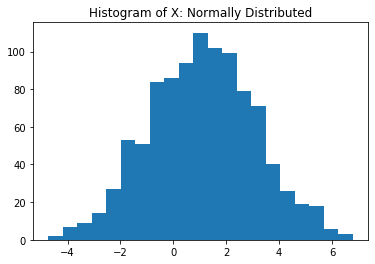

In [0]:
_ = plt.hist(X, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram of X: Normally Distributed")
plt.show()

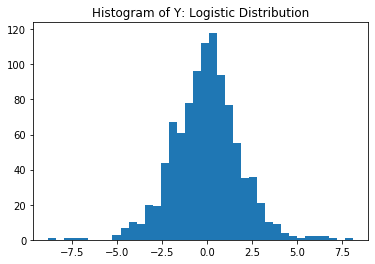

In [0]:
_ = plt.hist(Y, bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram of Y: Logistic Distribution")
plt.show()

Now we're ready to use this on our data that we generated.

In [0]:
print(pvalue(X, 3))
print(pvalue(X, 4))
print(pvalue(X, 5))
print(pvalue(X, 6))
print(pvalue(X, 7))
print(pvalue(X, 8))

0.7361482909828037
0.28574106010518174
0.4693167424239404
0.6386762799268081
0.7661839417619782
0.8081284521455068


Good. We never reject.

In [0]:
print(pvalue(Y, 3))
print(pvalue(Y, 4))
print(pvalue(Y, 5))
print(pvalue(Y, 6))
print(pvalue(Y, 7))
print(pvalue(Y, 8))

0.9168723808006406
0.0
1.1102230246251565e-16
2.220446049250313e-16
1.1102230246251565e-16
4.440892098500626e-16


Once we get to k=4, our test is never fooled by the data from the logistic distribution.

Optimal k? I have no idea. How about 1000? I see no reason why more is not more in this case. I'm almost certainly missing something.

# END

.

.

.

.

In [0]:
"""OLD"""
def omega_est(X,k):
    N = X.shape[0] # sample size
    xbar = np.mean(X) # sample mean
    ssr = 0
    for x in X:
        ssr = ssr + (x - xbar)**2
    s2 = (1/(N-1))*ssr # sample variance
    # by setting Omega to zero, we only need to change for ->
    # i,j are both even or both odd
    Omega = np.zeros((k,k))
    for i in range(k):
        for j in range(k):
            # define constant for when both are even
            constant = doublefact(i+j-1)-doublefact(i-1)*doublefact(j-1)
            if i % 2 == 0: # i is even
                if j % 2 == 0: # j is also even
                    Omega[i,j] = s2**((i+j)/2)*constant
            if i % 2 == 1: # i is odd
                if j % 2 == 1: # j is also odd
                    Omega[i,j] = s2**((i+j)/2)*doublefact(i+j-1)
    return Omega

### 6d. Matrix Economy 
(submitted to [Bcourses Discussion](https://bcourses.berkeley.edu/courses/1487913/discussion_topics/5748989) by Conner Jackson)

# Matrix Economy Discussion

## Projection Function

We define a function that, given matrices X and Y, returns the projection of Y on X without creating an $n \times n$ matrix that might consume all available memory.

In [0]:
import numpy as np
import scipy.linalg as la

def project_economically(X, Y):
    '''Return the projection of Y on X without using up all the RAM
    
    For an (n x k) X matrix, and (n x m) Y matrix (k and m small)
    '''
    XY = X.T @ Y  # a (k x m) matrix
    XXinv = la.inv(X.T @ X)  # a (k x k) matrix
    return X @ XXinv @ XY  # the final (n x m) projection matrix

## Projection Objects

We can also define a class that, for each X, holds the pieces necessary to project any given Y onto that X without creating an $n \times n$ matrix that might consume all available memory. 

In [0]:
class Projection:
    """Projection matrix objects"""
    
    def __init__(self, X):
        """Initialize the memory-saving components"""
        self.X = X
        self.XXinv = la.inv(X.T @ X)  # a (k x k) matrix
        
    def P(self, Y):
        """project Y onto the object's X"""
        XY = self.X.T @ Y  # a (k x m) matrix
        # return the final (n x m) projection matrix
        return self.X @ self.XXinv @ XY
    

Initializing the object with the desired X matrix creates the required object attributes. (Note the following code will not run unless an example X and Y are defined).

In [0]:
project_X = Projection(X)

Then calling the object method `P` will project the passed Y matrix onto X.

In [0]:
Y_proj = project_X.P(Y)

## Projection Diagonal

We define a function to calculate the diagonal of a projection matrix without building the full matrix.

In [0]:
def projection_diagonal(X):
    """Calculate the diagonal elements of a projection matrix"""
    XXXinv = X @ la.inv(X.T @ X)  # an (n x k) matrix, safe to construct
    proj_diag = []
    for XXXinv_row, X_col in zip(XXXinv, X.T):
        # numpy iterates over rows. So to iterate over the columns
        # of X, we transpose it. For every element of the diagonal, 
        # dot that row of the left matrix with that column of the 
        # right matrix.
        proj_diag.append(np.dot(XXXinv_row, X_col))
    return np.array(proj_diag)

## Final Word

TBD